In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [3]:
df=pd.read_csv("training7.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,0,1,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,1,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,0,1,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,1,0,0,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,0,1,0,0,250000


In [4]:
corr=df.corr()

In [5]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,-0.011378,...,-0.242598,NaN,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060,NaN,1.000000
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,-0.225013,NaN,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,NaN,0.790982
GrLivArea,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,-0.009640,...,-0.121102,NaN,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239,NaN,0.708624
GarageCars,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,-0.038264,...,-0.197458,NaN,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164,NaN,0.640409
GarageArea,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,-0.018227,...,-0.218665,NaN,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714,NaN,0.623431
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,0.104810,...,-0.212851,NaN,-0.032031,-0.055895,-0.047002,0.019569,-0.160222,0.266268,NaN,0.613581
1stFlrSF,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.445863,0.097117,...,-0.198056,NaN,-0.030196,-0.037451,0.068107,0.021949,-0.158772,0.221037,NaN,0.605852
FullBath,0.131608,0.180424,0.126031,0.550600,-0.194149,0.468271,0.439046,0.275730,0.058543,-0.076444,...,-0.161352,NaN,-0.093473,-0.006193,0.016794,-0.003225,-0.110040,0.232767,NaN,0.560664
BsmtQual_Ex,-0.055495,0.210258,0.065639,0.470780,-0.151008,0.319394,0.286165,0.333908,0.271434,-0.042850,...,-0.286102,NaN,-0.052580,-0.015756,-0.027366,-0.035427,-0.221979,0.378613,NaN,0.553105
TotRmsAbvGrd,0.040380,0.320146,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280027,0.044316,-0.035227,...,-0.113335,NaN,-0.050332,-0.008639,0.059698,0.031347,-0.092644,0.142032,NaN,0.533723


In [6]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [7]:
model=LinearRegression(fit_intercept=True)

In [8]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [9]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [10]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,23899.953808,37778.205723,0.813933
1,11,23536.241833,37491.461882,0.816747
2,12,23304.774057,37411.920294,0.817524
3,13,22707.932171,36213.093273,0.829031
4,14,22732.894229,36237.043467,0.828805
...,...,...,...,...
105,115,19587.776198,30563.475933,0.878216
106,116,19583.097028,30560.906270,0.878236
107,117,19702.329221,30617.666190,0.877783
108,118,19700.459450,30549.991232,0.878323


In [11]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
50,60,18942.974883,29725.476129,0.884802
49,59,18957.718048,29751.360405,0.884602
51,61,18972.843169,29745.081229,0.884650
52,62,18973.005055,29744.862055,0.884652
48,58,18979.346464,29815.496719,0.884104
...,...,...,...,...
3,13,22707.932171,36213.093273,0.829031
4,14,22732.894229,36237.043467,0.828805
2,12,23304.774057,37411.920294,0.817524
1,11,23536.241833,37491.461882,0.816747


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\385496469.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\385496469.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


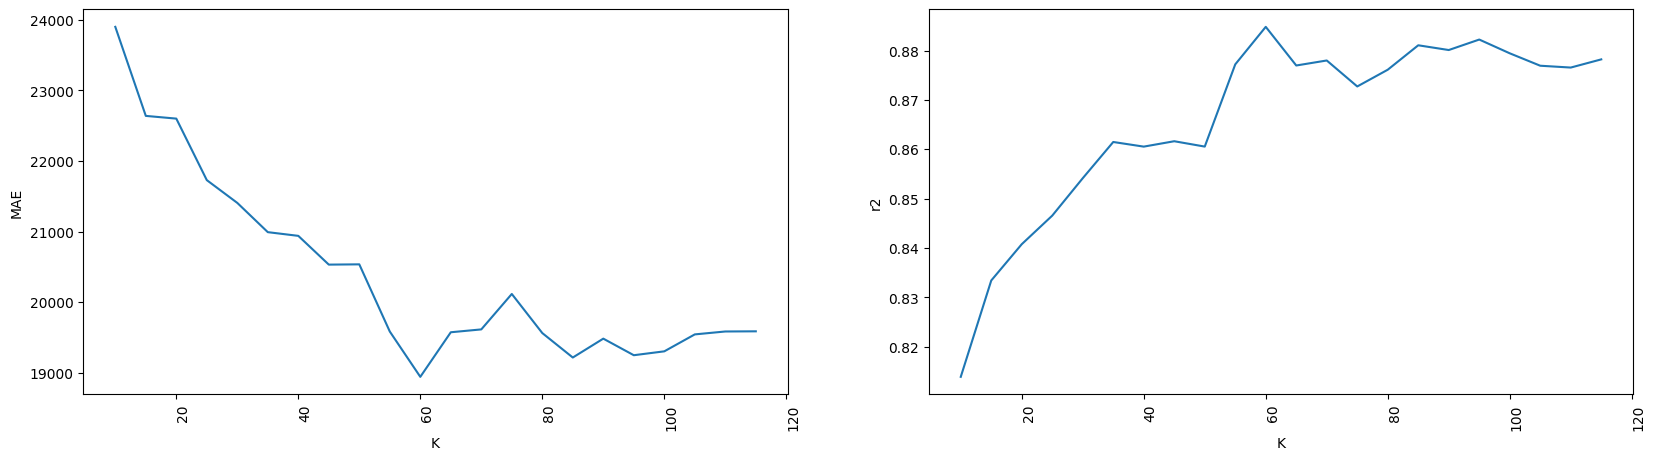

In [12]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic[::5],x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic[::5],x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [13]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               1.788113e+03
LotFrontage              4.847253e+02
LotArea                  9.955741e+07
OverallQual              1.911369e+00
OverallCond              1.237474e+00
                             ...     
SaleCondition_Family     1.351098e-02
SaleCondition_Normal     1.472490e-01
SaleCondition_Partial    7.828626e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [14]:
varr.loc[varr > 0.1].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

### 2.USING VarianceThreshold FROM SKLEARN

In [15]:
from sklearn.feature_selection import VarianceThreshold

In [16]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

In [17]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/1000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,21350.585011,33924.016887,0.849962
1,101,21350.585011,33924.016887,0.849962
2,102,21350.585011,33924.016887,0.849962
3,103,21350.585011,33924.016887,0.849962
4,104,21350.585011,33924.016887,0.849962
...,...,...,...,...
395,495,23200.058112,36715.765453,0.824252
396,496,23200.058112,36715.765453,0.824252
397,497,23200.058112,36715.765453,0.824252
398,498,23200.058112,36715.765453,0.824252


In [18]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,100,21350.585011,33924.016887,0.849962
1,101,21350.585011,33924.016887,0.849962
2,102,21350.585011,33924.016887,0.849962
3,103,21350.585011,33924.016887,0.849962
4,104,21350.585011,33924.016887,0.849962
...,...,...,...,...
306,406,23215.635252,36720.651234,0.824205
305,405,23215.635252,36720.651234,0.824205
304,404,23215.635252,36720.651234,0.824205
302,402,23215.635252,36720.651234,0.824205


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\3263348066.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\3263348066.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


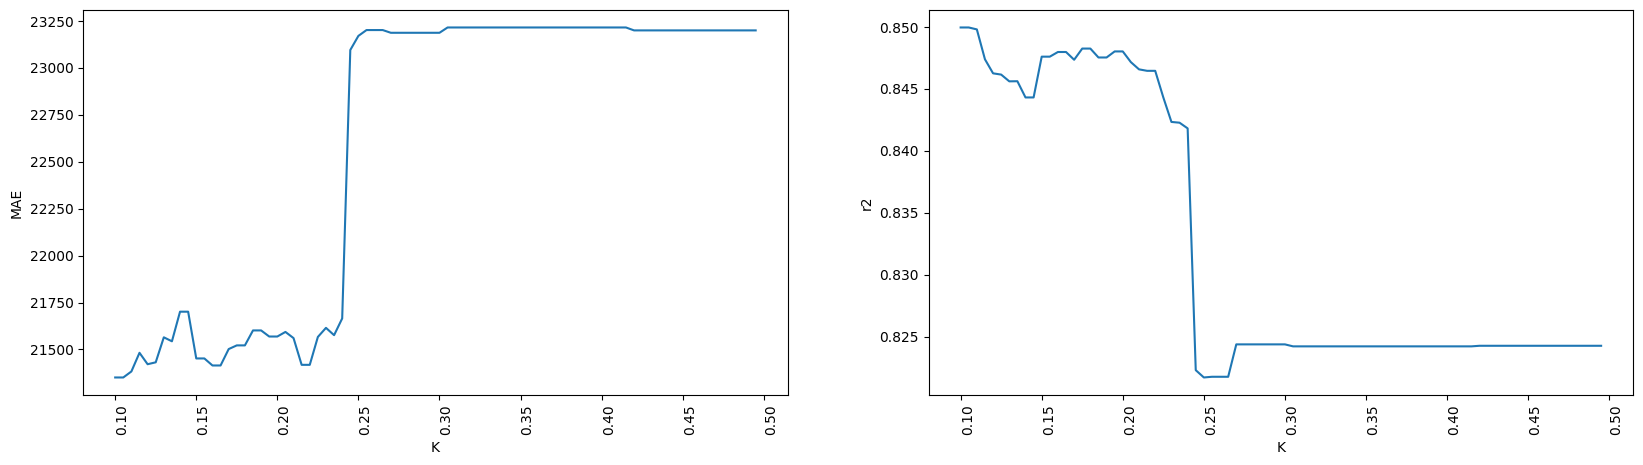

In [19]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic[::5],x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic[::5],x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


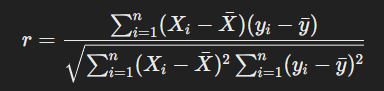

### Using numpy

In [20]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [21]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.7909816005838051


In [22]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['OverallQual', 0.7909816005838051],
 ['TotalBsmtSF', 0.6135805515591953],
 ['1stFlrSF', 0.6058521846919146],
 ['GrLivArea', 0.708624477612652],
 ['GarageCars', 0.640409197258352],
 ['GarageArea', 0.6234314389183616]]

### Using sklearn

In [23]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [24]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression.csv")
statistic


,K,MAE,RMSE,r2
0,5,25284.809689,39979.430125,0.791618
1,6,25289.042840,39899.060389,0.792455
2,7,25255.460497,39916.481638,0.792274
3,8,23884.716161,37839.385764,0.813330
4,9,23899.953808,37778.205723,0.813933
...,...,...,...,...
110,115,19583.097028,30560.906270,0.878236
111,116,19702.329221,30617.666190,0.877783
112,117,19700.459450,30549.991232,0.878323
113,118,19758.898726,30586.595162,0.878031


In [25]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
54,59,18942.974883,29725.476129,0.884802
53,58,18957.718048,29751.360405,0.884602
55,60,18972.843169,29745.081229,0.884650
56,61,18973.005055,29744.862055,0.884652
52,57,18979.346464,29815.496719,0.884104
...,...,...,...,...
3,8,23884.716161,37839.385764,0.813330
4,9,23899.953808,37778.205723,0.813933
2,7,25255.460497,39916.481638,0.792274
0,5,25284.809689,39979.430125,0.791618


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


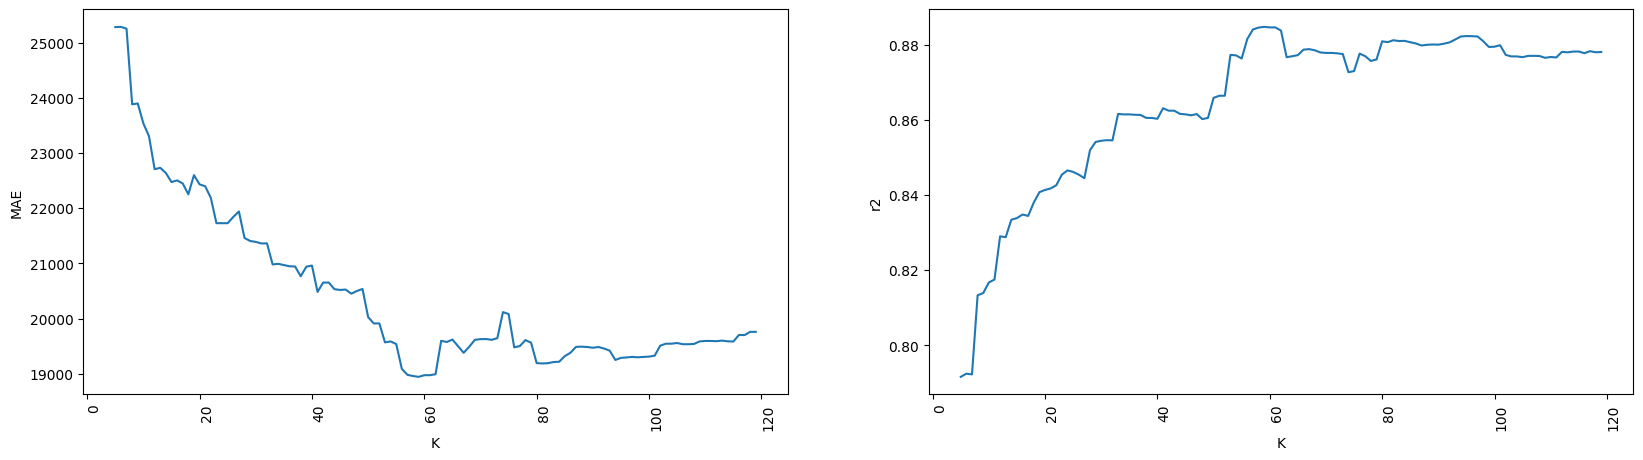

In [26]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

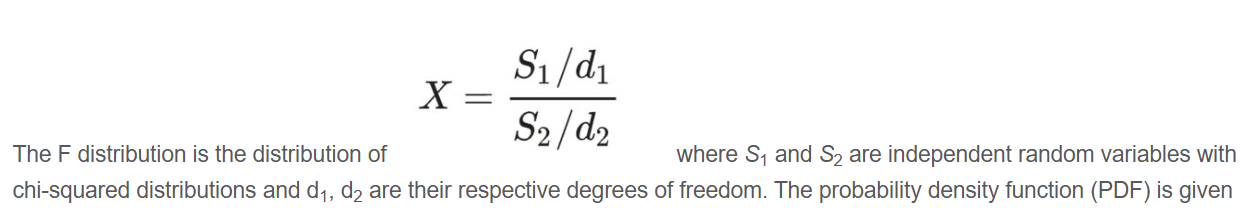

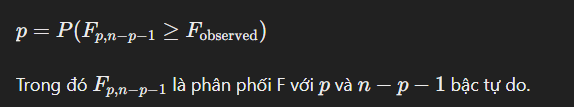

In [27]:
from sklearn.feature_selection import f_regression

In [28]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression.csv")
statistic

,K,MAE,RMSE,r2
0,5,25284.809689,39979.430125,0.791618
1,6,25289.042840,39899.060389,0.792455
2,7,25218.782929,39868.538790,0.792773
3,8,25222.588402,39862.752611,0.792833
4,9,23801.791930,37769.940487,0.814015
...,...,...,...,...
110,115,19749.867584,30941.667178,0.875183
111,116,19698.754881,30944.311900,0.875162
112,117,19694.298118,30909.742066,0.875440
113,118,19761.164614,30988.066908,0.874808


In [29]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
93,98,18788.911806,29593.149714,0.885826
94,99,18793.391663,29644.825156,0.885427
95,100,18825.461578,29678.173565,0.885169
96,101,18826.228843,29678.259098,0.885168
91,96,18829.119511,29608.788119,0.885705
...,...,...,...,...
5,10,23805.700146,37740.189108,0.814308
2,7,25218.782929,39868.538790,0.792773
3,8,25222.588402,39862.752611,0.792833
0,5,25284.809689,39979.430125,0.791618


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_24224\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


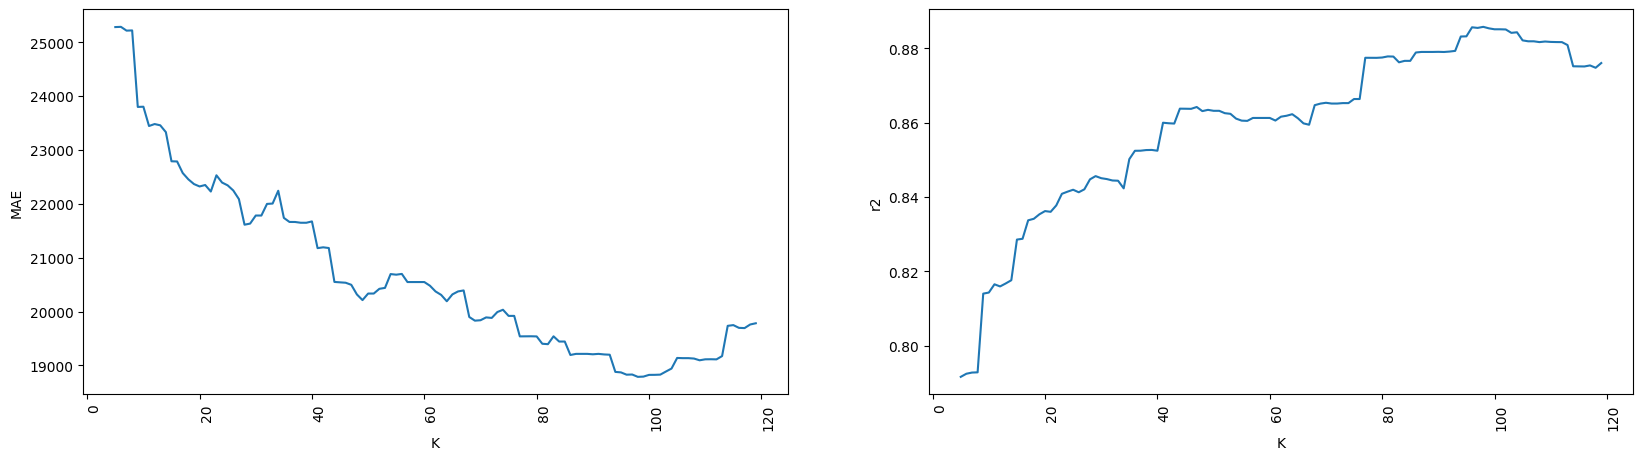

In [30]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

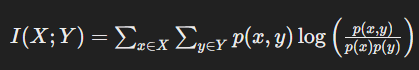

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

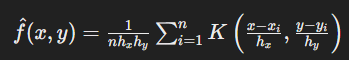

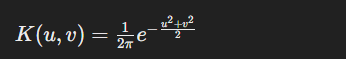

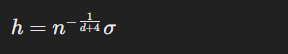

In [31]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [32]:
from sklearn.feature_selection import mutual_info_regression

In [33]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

KeyboardInterrupt: 

In [ ]:
statistic.to_csv("mutual_infomation.csv")

In [ ]:
statistic.sort_values("MAE",ascending=True)

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

In [ ]:
df

In [ ]:
from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

In [ ]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

In [ ]:
statistic.to_csv("RFE.csv")

In [ ]:
statistic=pd.read_csv("RFE.csv")

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

In [ ]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

In [ ]:
statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,25284.809689,39979.430125,0.791618
1,6,25289.042840,39899.060389,0.792455
2,7,25255.460497,39916.481638,0.792274
3,8,23884.716161,37839.385764,0.813330
4,9,23899.953808,37778.205723,0.813933
...,...,...,...,...
110,115,19583.097028,30560.906270,0.878236
111,116,19702.329221,30617.666190,0.877783
112,117,19700.459450,30549.991232,0.878323
113,118,19758.898726,30586.595162,0.878031


In [37]:
f=pd.read_csv("f_regression.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,25284.809689,39979.430125,0.791618
1,6,25289.042840,39899.060389,0.792455
2,7,25218.782929,39868.538790,0.792773
3,8,25222.588402,39862.752611,0.792833
4,9,23801.791930,37769.940487,0.814015
...,...,...,...,...
110,115,19749.867584,30941.667178,0.875183
111,116,19698.754881,30944.311900,0.875162
112,117,19694.298118,30909.742066,0.875440
113,118,19761.164614,30988.066908,0.874808


In [38]:
mutual=pd.read_csv("mutual_infomation.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,25414.725403,39763.295266,0.793865
1,6,24882.393120,39759.834815,0.793901
2,7,25203.865559,39747.644880,0.794028
3,8,25072.114397,39666.804587,0.794865
4,9,25145.533221,39703.849232,0.794481
...,...,...,...,...
110,115,18880.846074,30527.237188,0.878504
111,116,19447.968401,31162.252356,0.873397
112,117,19229.222021,31172.862033,0.873311
113,118,18973.988527,31128.912821,0.873668


In [42]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,25284.809689,39979.430125,0.791618,25284.809689,39979.430125,0.791618
1,6,25289.042840,39899.060389,0.792455,25289.042840,39899.060389,0.792455
2,7,25255.460497,39916.481638,0.792274,25218.782929,39868.538790,0.792773
3,8,23884.716161,37839.385764,0.813330,25222.588402,39862.752611,0.792833
4,9,23899.953808,37778.205723,0.813933,23801.791930,37769.940487,0.814015
...,...,...,...,...,...,...,...
110,115,19583.097028,30560.906270,0.878236,19749.867584,30941.667178,0.875183
111,116,19702.329221,30617.666190,0.877783,19698.754881,30944.311900,0.875162
112,117,19700.459450,30549.991232,0.878323,19694.298118,30909.742066,0.875440
113,118,19758.898726,30586.595162,0.878031,19761.164614,30988.066908,0.874808


In [43]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,25284.809689,39979.430125,0.791618,25284.809689,39979.430125,0.791618,25414.725403,39763.295266,0.793865
1,6,25289.042840,39899.060389,0.792455,25289.042840,39899.060389,0.792455,24882.393120,39759.834815,0.793901
2,7,25255.460497,39916.481638,0.792274,25218.782929,39868.538790,0.792773,25203.865559,39747.644880,0.794028
3,8,23884.716161,37839.385764,0.813330,25222.588402,39862.752611,0.792833,25072.114397,39666.804587,0.794865
4,9,23899.953808,37778.205723,0.813933,23801.791930,37769.940487,0.814015,25145.533221,39703.849232,0.794481
...,...,...,...,...,...,...,...,...,...,...
110,115,19583.097028,30560.906270,0.878236,19749.867584,30941.667178,0.875183,18880.846074,30527.237188,0.878504
111,116,19702.329221,30617.666190,0.877783,19698.754881,30944.311900,0.875162,19447.968401,31162.252356,0.873397
112,117,19700.459450,30549.991232,0.878323,19694.298118,30909.742066,0.875440,19229.222021,31172.862033,0.873311
113,118,19758.898726,30586.595162,0.878031,19761.164614,30988.066908,0.874808,18973.988527,31128.912821,0.873668


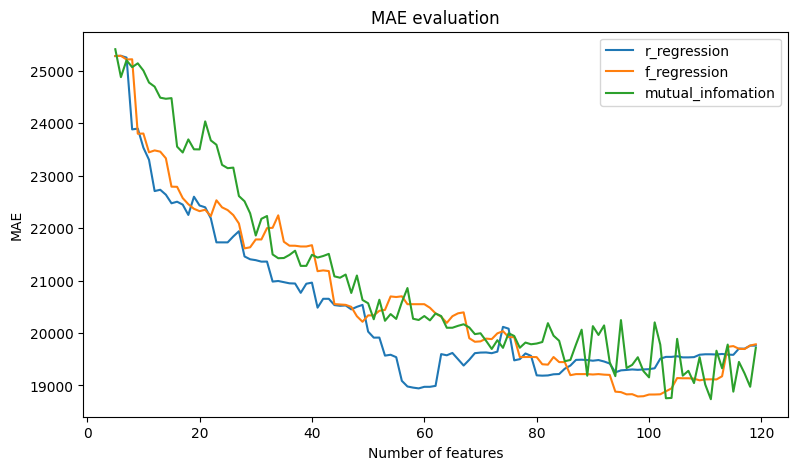

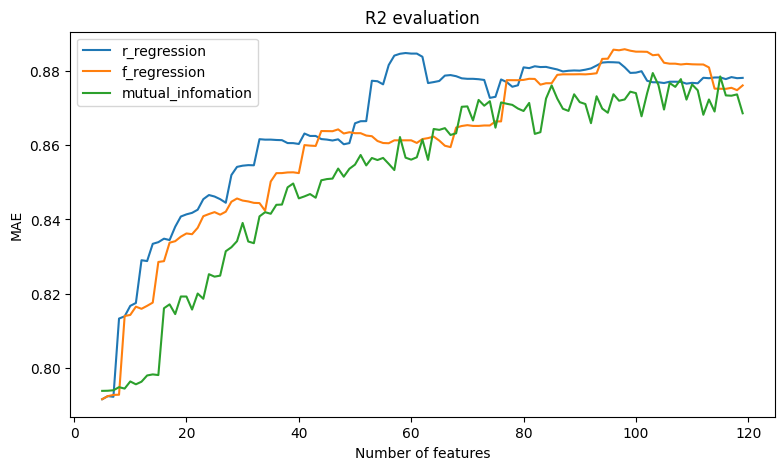

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of features")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of features")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()

In [6]:
a=np.array([[1,2,3],[1,4,3]])
a[[0,1]]=a[[1,0]]
a

array([[1, 4, 3],
       [1, 2, 3]])